In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import seaborn as sns
import datetime as dat
import matplotlib as plt
import datetime as dt
import xgboost as xgb
%matplotlib inline
sns.set()

In [2]:
features_ventana1 = pd.read_csv('../xgb/features_clicks_gonzalo_ventana1.csv').set_index('ref_hash')
aux_ventana1 = pd.read_csv('../xgb/features_events_gonzalo_ventana1.csv').set_index('ref_hash')
features_ventana1 = features_ventana1.join(aux_ventana1, how = 'outer', lsuffix = '_clicks', rsuffix = '_events')
aux_ventana1 = pd.read_csv('../xgb/features_installs_gonzalo_ventana1.csv').set_index('ref_hash')
features_ventana1 = features_ventana1.join(aux_ventana1, how = 'outer', rsuffix = '_installs')
aux_ventana1 = pd.read_csv('../xgb/features_auctions_gonzalo_ventana1.csv').set_index('ref_hash')
features_ventana1 = features_ventana1.join(aux_ventana1, how = 'outer', rsuffix = '_auctions')
features_ventana1.fillna(0)

labels_st_ventana1 = pd.read_csv('../xgb/labels_st_ventana1.csv').set_index('device_id')
ventana1 = features_ventana1.join(labels_st_ventana1, how = 'left').fillna(259200)#3 dias pasado a segundos

In [3]:
features_ventana2 = pd.read_csv('../xgb/features_clicks_gonzalo_ventana2.csv').set_index('ref_hash')
aux_ventana2 = pd.read_csv('../xgb/features_events_gonzalo_ventana2.csv').set_index('ref_hash')
features_ventana2 = features_ventana2.join(aux_ventana2, how = 'outer', lsuffix = '_clicks', rsuffix = '_events')
aux_ventana2 = pd.read_csv('../xgb/features_installs_gonzalo_ventana2.csv').set_index('ref_hash')
features_ventana2 = features_ventana2.join(aux_ventana2, how = 'outer', rsuffix = '_installs')
aux_ventana2 = pd.read_csv('../xgb/features_auctions_gonzalo_ventana2.csv').set_index('ref_hash')
features_ventana2 = features_ventana2.join(aux_ventana2, how = 'outer', rsuffix = '_auctions')
features_ventana2 = features_ventana2.fillna(0)

labels_st_ventana2 = pd.read_csv('../xgb/labels_st_ventana2.csv').set_index('device_id')
ventana2 = features_ventana2.join(labels_st_ventana2, how = 'left').fillna(259200)#3 dias pasado a segundos

In [4]:
features_ventana3 = pd.read_csv('../xgb/features_clicks_gonzalo_ventana3.csv').set_index('ref_hash')
aux_ventana3 = pd.read_csv('../xgb/features_events_gonzalo_ventana3.csv').set_index('ref_hash')
features_ventana3 = features_ventana3.join(aux_ventana3, how = 'outer', lsuffix = '_clicks', rsuffix = '_events')
aux_ventana3 = pd.read_csv('../xgb/features_installs_gonzalo_ventana3.csv').set_index('ref_hash')
features_ventana3 = features_ventana3.join(aux_ventana3, how = 'outer', rsuffix = '_installs')
aux_ventana3 = pd.read_csv('../xgb/features_auctions_gonzalo_ventana3.csv').set_index('ref_hash')
features_ventana3 = features_ventana3.join(aux_ventana3, how = 'outer', rsuffix = '_auctions')
features_ventana3 = features_ventana3.fillna(0)

labels_st_ventana3 = pd.read_csv('../xgb/labels_st_ventana3.csv').set_index('device_id')
ventana3 = features_ventana3.join(labels_st_ventana3, how = 'left').fillna(259200)#3 dias pasado a segundos

In [5]:
features_ventana4 = pd.read_csv('../xgb/features_clicks_gonzalo_ventana4.csv').set_index('ref_hash')
aux_ventana4 = pd.read_csv('../xgb/features_events_gonzalo_ventana4.csv').set_index('ref_hash')
features_ventana4 = features_ventana4.join(aux_ventana4, how = 'outer', lsuffix = '_clicks', rsuffix = '_events')
aux_ventana4 = pd.read_csv('../xgb/features_installs_gonzalo_ventana4.csv').set_index('ref_hash')
features_ventana4 = features_ventana4.join(aux_ventana4, how = 'outer', rsuffix = '_installs')
aux_ventana4 = pd.read_csv('../xgb/features_auctions_gonzalo_ventana4.csv').set_index('ref_hash')
features_ventana4 = features_ventana4.join(aux_ventana4, how = 'outer', rsuffix = '_auctions')
features_ventana4 = features_ventana4.fillna(0)

labels_st_ventana4 = pd.read_csv('../xgb/labels_st_ventana4.csv').set_index('device_id')
ventana4 = features_ventana4.join(labels_st_ventana4, how = 'left').fillna(259200)#3 dias pasado a segundos

In [6]:
matriz = ventana1.append(ventana2).append(ventana3).append(ventana4).reset_index('ref_hash')
filas = matriz.shape[0]
matriz.head(5)

,ref_hash,latitude_sum,latitude_mean,latitude_std,latitude_min,latitude_max,longitude_sum,longitude_mean,longitude_std,longitude_min,...,time_categ1 a 3 min_std,time_categ1 a 3 min_min,time_categ1 a 3 min_max,time_categ3 a 10min_sum,time_categ3 a 10min_mean,time_categ3 a 10min_std,time_categ3 a 10min_min,time_categ3 a 10min_max,Unnamed: 0,tiempo_hasta_aparicion
0,1461247282174365,1.716947,1.716947,0.0,1.716947,1.716947,0.871203,0.871203,0.0,0.871203,...,0.0,0,0,1,1.0,0.0,1,1,231680.0,259200.000000
1,5470466329076030,1.873294,1.873294,0.0,1.873294,1.873294,0.844857,0.844857,0.0,0.844857,...,0.0,0,0,0,0.0,0.0,0,0,125282.0,17850.727626
2,5534899846690585,1.816352,1.816352,0.0,1.816352,1.816352,0.833068,0.833068,0.0,0.833068,...,0.0,0,0,0,0.0,0.0,0,0,86728.0,23766.251362
3,7429113196145773,1.792518,1.792518,0.0,1.792518,1.792518,0.866689,0.866689,0.0,0.866689,...,0.0,0,0,0,0.0,0.0,0,0,158206.0,13825.152641
4,8577232270715133,1.712736,1.712736,0.0,1.712736,1.712736,0.869157,0.869157,0.0,0.869157,...,0.0,0,0,0,0.0,0.0,0,0,70494.0,14322.143202


In [7]:
features = matriz.iloc[:,:-1]
labels = matriz.iloc[:,-1]
data_dmatrix = xgb.DMatrix(data=features,label=labels)

/usr/local/lib/python2.7/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python2.7/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [8]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = \
    train_test_split(features, labels, test_size=0.25, random_state=123)

In [20]:
params = {
        'colsample_bytree': [0.3, 0.01],
        'learning_rate': [0.055, 0.005],
        'max_depth': [15, 1],
        'alpha': [10, 0.1],
        'num_boost_round': [50, 1],
        'gamma': [10, 0.1],
        'n_jobs': [10, 1],
        'n_estimators': [89, 1],
        'n_folds': [10, 1],
        }

xg_reg = xgb.XGBRegressor(objective ='reg:linear', max_depth = params['max_depth'][0], learning_rate = params['learning_rate'][0], \
                          n_estimators = params['n_estimators'][0], n_jobs = params['n_jobs'][0], gamma = params['gamma'][0], \
                          colsample_bytree = params['colsample_bytree'][0], alpha = params['alpha'][0], \
                          num_boost_round = params['num_boost_round'][0], n_folds = params['n_folds'][0])

xg_reg.fit(train_features,train_labels)
predicted_labels = xg_reg.predict(test_features)
rmse = np.sqrt(mean_squared_error(test_labels, predicted_labels))
print(rmse)
best_score = rmse
best_try = params.copy()
def probar_sumar(hiperparametro):
    params[hiperparametro][0] += params[hiperparametro][1]
    xg_reg = xgb.XGBRegressor(objective ='reg:linear', max_depth = params['max_depth'][0], learning_rate = params['learning_rate'][0], \
                              n_estimators = params['n_estimators'][0], n_jobs = params['n_jobs'][0], gamma = params['gamma'][0], \
                              colsample_bytree = params['colsample_bytree'][0], alpha = params['alpha'][0], \
                              num_boost_round = params['num_boost_round'][0], n_folds = params['n_folds'][0])
    xg_reg.fit(train_features,train_labels)
    predicted_labels = xg_reg.predict(test_features)
    rmse = np.sqrt(mean_squared_error(test_labels, predicted_labels))
    return rmse
    
def probar_restar(hiperparametro):
    params[hiperparametro][0] -= params[hiperparametro][1]
    xg_reg = xgb.XGBRegressor(objective ='reg:linear', max_depth = params['max_depth'][0], learning_rate = params['learning_rate'][0], \
                              n_estimators = params['n_estimators'][0], n_jobs = params['n_jobs'][0], gamma = params['gamma'][0], \
                              colsample_bytree = params['colsample_bytree'][0], alpha = params['alpha'][0], \
                              num_boost_round = params['num_boost_round'][0], n_folds = params['n_folds'][0])
    xg_reg.fit(train_features,train_labels)
    predicted_labels = xg_reg.predict(test_features)
    rmse = np.sqrt(mean_squared_error(test_labels, predicted_labels))
    return rmse
    
for i in range(2):
    for hiperparam in params:
        mejor = True
        while(mejor):
            score = probar_sumar(hiperparam)
            mejor = ( score < best_score)
            if mejor:
                best_score = score
                print(best_score)
        params[hiperparam][0] -= params[hiperparam][1]
        
        mejor = True
        while(mejor):
            score = probar_restar(hiperparam)
            mejor = ( score < best_score)
            if mejor:
                best_score = score
                print(best_score)
        params[hiperparam][0] += params[hiperparam][1]

params

49077.2275073329
49072.965948734
49069.46759556803
48964.826268336685
48956.85352746344
48949.433273745766
48948.61005886034
48946.74221939751


{'alpha': [10.0, 0.1],
 'colsample_bytree': [0.3, 0.01],
 'gamma': [10.0, 0.1],
 'learning_rate': [0.055, 0.005],
 'max_depth': [15, 1],
 'n_estimators': [89, 1],
 'n_folds': [10, 1],
 'n_jobs': [10, 1],
 'num_boost_round': [50, 1]}

In [ ]:
print(error)

In [ ]:
train_features, test_features, train_labels, test_labels = \
    train_test_split(features, labels, test_size=0.3, random_state=123)

In [4]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', 
                colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [5]:
xg_reg.fit(train_features,train_labels)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

## Información de los resultados

In [9]:
cv_results.head()

,test-rmse-mean,test-rmse-std,train-rmse-mean,train-rmse-std
0,114817.953125,1755.868482,114788.521875,184.141191
1,110675.627344,1958.987990,110600.289062,515.856557
2,107139.460156,1983.205307,107030.921094,749.578924
3,103817.791406,2200.718463,103650.713281,1224.537690
4,101332.395312,2331.961582,101109.750781,1484.651973


## Error final

In [10]:
print((cv_results["test-rmse-mean"]).tail(1))

49    79795.210156
Name: test-rmse-mean, dtype: float64


## Visualizando los árboles

In [11]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

## Importancia de los features (cuantas veces aparecen en los árboles)

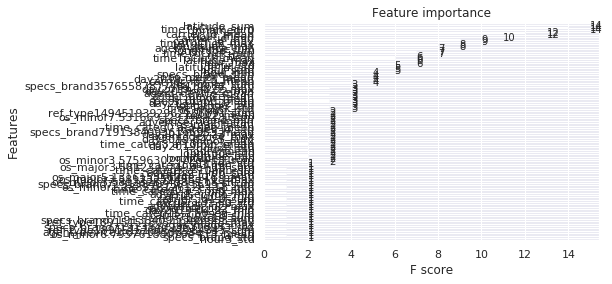

In [12]:
import matplotlib.pyplot as plt

xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [50, 60]
plt.show()

In [13]:
features_ventana7 = pd.read_csv('../xgb/features_clicks_gonzalo_ventana7.csv').set_index('ref_hash')
aux_ventana7 = pd.read_csv('../xgb/features_events_gonzalo_ventana7.csv').set_index('ref_hash')
features_ventana7 = features_ventana7.join(aux_ventana7, how = 'outer', lsuffix = '_clicks', rsuffix = '_events')
aux_ventana7 = pd.read_csv('../xgb/features_installs_gonzalo_ventana7.csv').set_index('ref_hash')
features_ventana7 = features_ventana7.join(aux_ventana7, how = 'outer', rsuffix = '_installs')
aux_ventana7 = pd.read_csv('../xgb/features_auctions_gonzalo_ventana7.csv').set_index('ref_hash')
features_ventana7 = features_ventana7.join(aux_ventana7, how = 'outer', rsuffix = '_auctions')
features_ventana7=features_ventana7.fillna(0)

labels_ventana7 = pd.read_csv('../xgb/target_st.csv').set_index('ref_hash')

ventana7 = features_ventana7.join(labels_st_ventana1, how = 'right').fillna(0)#3 dias pasado a segundos
ventana7

,latitude_sum,latitude_mean,latitude_std,latitude_min,latitude_max,longitude_sum,longitude_mean,longitude_std,longitude_min,longitude_max,...,time_categ1 a 3 min_std,time_categ1 a 3 min_min,time_categ1 a 3 min_max,time_categ3 a 10min_sum,time_categ3 a 10min_mean,time_categ3 a 10min_std,time_categ3 a 10min_min,time_categ3 a 10min_max,Unnamed: 0,tiempo_hasta_aparicion
device_id,,,,,,,,,,,,,,,,,,,,,
100033926124811452,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,184250.587009
1000400432115255220,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,9663.200096
1001123163431776865,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,6107.707241
1001144380199556647,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,54775.733409
1001358436431521709,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,13147.387349
1001650136929210538,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,48.667344
1001893648440705480,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,146533.939844
1002004782572506858,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,12671.761233
1002085736203824817,1.735862,1.735862,0.0,1.735862,1.735862,0.876248,0.876248,0.0,0.876248,0.876248,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,4118.989811


In [14]:
features_ventana7 = ventana7.iloc[:,:-1]
labels_ventana7 = ventana7.iloc[:,-1]

In [15]:
data_dmatrix = xgb.DMatrix(data=features,label=labels)

In [16]:
predicted_labels = cv_results.predict(xgb.DMatrix(data=features_ventana7))

AttributeError: 'DataFrame' object has no attribute 'predict'